In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline
# ML Libraries

In [46]:
univ = pd.read_csv('Most-Recent-Cohorts-Institution.csv')
univ.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,834.0,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1233.0,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,78.0,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,891.0,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1077.0,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0


In [47]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Columns: 2989 entries, UNITID to MD_EARN_WNE_MALE1_P10
dtypes: float64(798), int64(17), object(2174)
memory usage: 151.9+ MB


In [55]:
cols = ["UNITID","OPEID","OPEID6","INSTNM","CITY","STABBR","ZIP","NPT4_PUB","NPT4_PRIV",
       "PPTUG_EF","LATITUDE","LONGITUDE","C150_L4_PELL_POOLED_SUPP","OPEFLAG","UGDS","UGDS_WHITE","UGDS_BLACK",
        "UGDS_HISP","UGDS_ASIAN","UGDS_AIAN","UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","FTFTPCTFLOAN_POOLED_SUPP",
       "RET_FT4_POOLED_SUPP","RET_FTL4_POOLED_SUPP","RET_PT4_POOLED_SUPP","RET_PTL4_POOLED_SUPP","ACTCMMID","SATVRMID",
        "SATMTMID","SATWRMID","GT_THRESHOLD_P10","MDEARN_ALL","MDCOMP_ALL"]


In [56]:
univ_data = univ[cols]

In [57]:
univ_data["Cost of Attending"] = univ_data["NPT4_PUB"].fillna(0) + univ_data["NPT4_PRIV"].fillna(0)

In [58]:
univ_data.drop(columns = ["NPT4_PUB","NPT4_PRIV"],inplace=True)

In [52]:
univ_data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,PPTUG_EF,LATITUDE,LONGITUDE,...,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,ACTCMMID,SATVRMID,SATMTMID,SATWRMID,GT_THRESHOLD_P10,MDEARN_ALL,Cost of Attending
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,0.0839,34.783368,-86.568502,...,NaN,0.283,NaN,18.0,475.0,455.0,414.0,0.6044,36819,15529.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.2360,33.505697,-86.799345,...,NaN,0.5417,NaN,26.0,614.0,595.0,NaN,0.7472,36819,16530.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,0.4228,32.362609,-86.174010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6286,36819,17618.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,0.1415,34.724557,-86.640449,...,NaN,0.2059,NaN,28.0,645.0,655.0,NaN,0.7769,36819,17208.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,0.0871,32.364317,-86.295677,...,NaN,0.25,NaN,17.0,485.0,462.0,NaN,0.5178,36819,19534.0


In [53]:
univ_data.isna().sum()

UNITID                         0
OPEID                          0
OPEID6                         0
INSTNM                         0
CITY                           0
STABBR                         0
ZIP                            0
PPTUG_EF                     859
LATITUDE                     554
LONGITUDE                    554
C150_L4_PELL_POOLED_SUPP    3535
OPEFLAG                        0
UGDS                         838
UGDS_WHITE                   838
UGDS_BLACK                   838
UGDS_HISP                    838
UGDS_ASIAN                   838
UGDS_AIAN                    838
UGDS_NHPI                    838
UGDS_2MOR                    838
UGDS_NRA                     838
UGDS_UNKN                    838
FTFTPCTFLOAN_POOLED_SUPP    1040
RET_FT4_POOLED_SUPP         4508
RET_FTL4_POOLED_SUPP        3541
RET_PT4_POOLED_SUPP         5077
RET_PTL4_POOLED_SUPP        4846
ACTCMMID                    5546
SATVRMID                    5577
SATMTMID                    5577
SATWRMID  

In [60]:
univ_data.to_csv("Most-Recent-Cohorts-Institution-abridged.csv")

<AxesSubplot:>

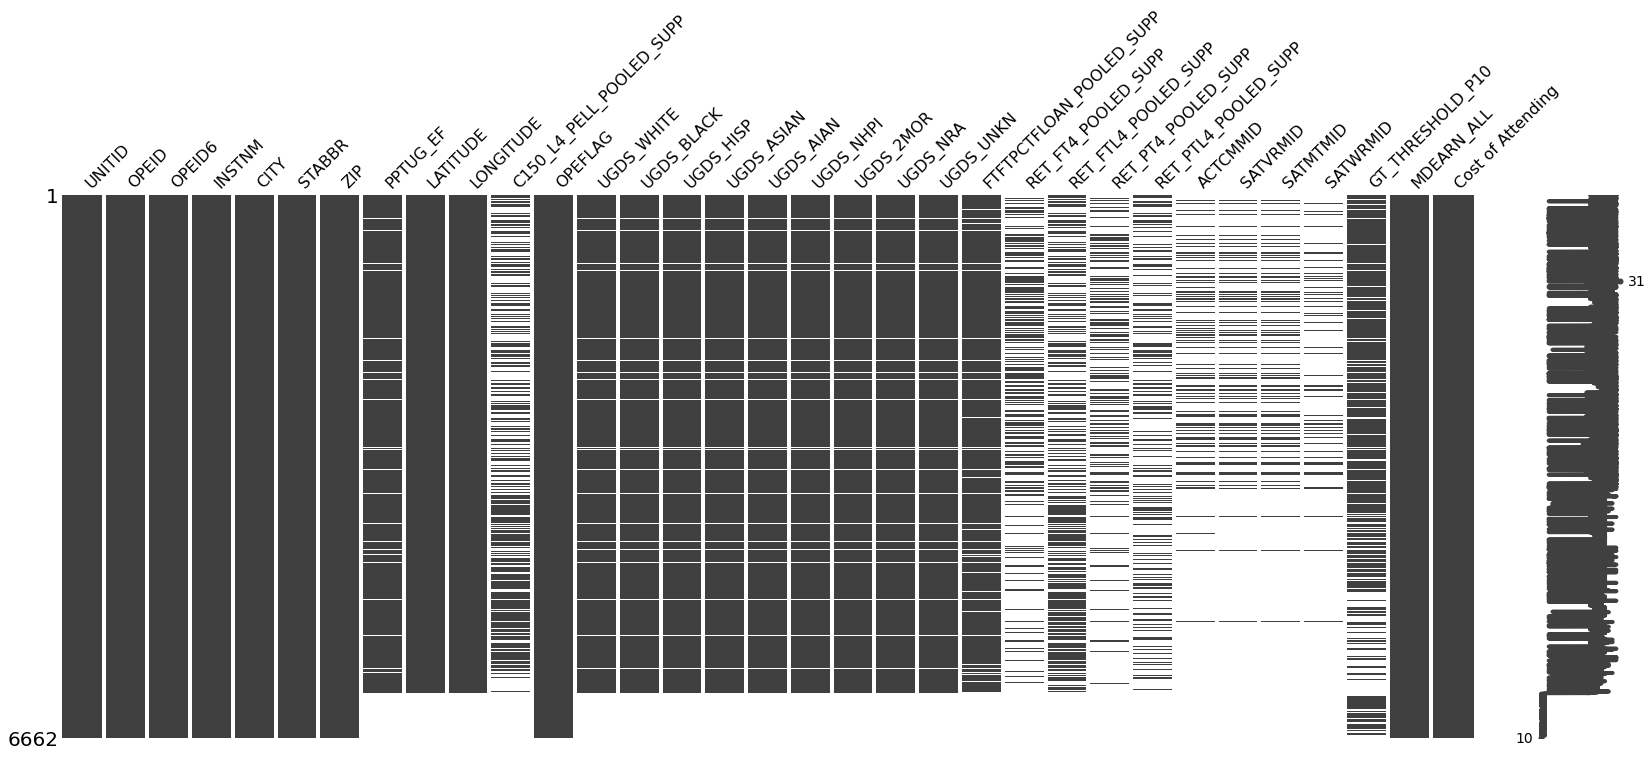

In [43]:
msno.matrix(univ_data)

In [91]:
univ_data

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,PPTUG_EF,LATITUDE,LONGITUDE,...,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,ACTCMMID,SATVRMID,SATMTMID,SATWRMID,GT_THRESHOLD_P10,MDEARN_ALL,MDCOMP_ALL,Cost of Attending
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,0.0839,34.783368,-86.568502,...,0.283,NaN,18.0,475.0,455.0,414.0,0.6044,36819,0.5872,15529.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.2360,33.505697,-86.799345,...,0.5417,NaN,26.0,614.0,595.0,NaN,0.7472,36819,0.5872,16530.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,0.4228,32.362609,-86.174010,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6286,36819,0.5872,17618.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,0.1415,34.724557,-86.640449,...,0.2059,NaN,28.0,645.0,655.0,NaN,0.7769,36819,0.5872,17208.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,0.0871,32.364317,-86.295677,...,0.25,NaN,17.0,485.0,462.0,NaN,0.5178,36819,0.5872,19534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,49576719,332917,3329,Pennsylvania State University-Penn State Wilke...,Lehman,PA,186270217,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36819,0.5872,0.0
6658,49576720,332918,3329,Pennsylvania State University-Penn State York,York,PA,174033326,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36819,0.5872,0.0
6659,49576721,332919,3329,Pennsylvania State University-Penn State Great...,Malvern,PA,193551488,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36819,0.5872,0.0
6660,49576722,332920,3329,Pennsylvania State University-Penn State Harri...,Middletown,PA,170574846,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36819,0.5872,0.0


In [126]:
fin_data = pd.read_csv("F1819_F2.csv")

In [127]:
for i in fin_data.join(univ_data,on="UNITID",rsuffix="uni").columns:
    print(i)

UNITID
XF2A01
F2A01
XF2A19
F2A19
XF2A20
F2A20
XF2A02
F2A02
XF2A03
F2A03
XF2A03A
F2A03A
XF2A04
F2A04
XF2A05
F2A05
XF2A05A
F2A05A
XF2A05B
F2A05B
XF2A06
F2A06
XF2A11
F2A11
XF2A12
F2A12
XF2A13
F2A13
XF2A15
F2A15
XF2A16
F2A16
XF2A17
F2A17
XF2A18
F2A18
XF2B01
F2B01
XF2B02
F2B02
XF2B03
F2B03
XF2B04
F2B04
XF2B05
F2B05
XF2B06
F2B06
XF2B07
F2B07
XF2C01
F2C01
XF2C02
F2C02
XF2C03
F2C03
XF2C04
F2C04
XF2C05
F2C05
XF2C06
F2C06
XF2C07
F2C07
XF2C08
F2C08
XF2C09
F2C09
XF2C10
F2C10
XF2D01
F2D01
XF2D012
F2D012
XF2D013
F2D013
XF2D014
F2D014
XF2D02
F2D02
XF2D022
F2D022
XF2D023
F2D023
XF2D024
F2D024
XF2D03
F2D03
XF2D032
F2D032
XF2D033
F2D033
XF2D034
F2D034
XF2D04
F2D04
XF2D042
F2D042
XF2D043
F2D043
XF2D044
F2D044
XF2D05
F2D05
XF2D052
F2D052
XF2D053
F2D053
XF2D054
F2D054
XF2D06
F2D06
XF2D062
F2D062
XF2D063
F2D063
XF2D064
F2D064
XF2D07
F2D07
XF2D072
F2D072
XF2D073
F2D073
XF2D074
F2D074
XF2D08
F2D08
XF2D082
F2D082
XF2D083
F2D083
XF2D084
F2D084
XF2D08A
F2D08A
XF2D082A
F2D082A
XF2D083A
F2D083A
XF2D084A
F2D084A
XF

In [128]:
fin_data.columns

Index(['UNITID', 'XF2A01', 'F2A01', 'XF2A19', 'F2A19', 'XF2A20', 'F2A20',
       'XF2A02', 'F2A02', 'XF2A03',
       ...
       'F2E135', 'XF2E136', 'F2E136', 'XF2E137', 'F2E137', 'F2FHA', 'XF2H01',
       'F2H01', 'XF2H02', 'F2H02   '],
      dtype='object', length=280)

In [129]:
fin_data = fin_data[fin_data.columns.drop(list(fin_data.filter(regex='^X')))]


In [130]:
univ_data.columns[0:10]

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'PPTUG_EF', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [131]:
loc_col = ['UNITID', 'INSTNM', 'ZIP', 'LATITUDE', 'LONGITUDE']

In [132]:
loc_data = univ_data[loc_col]

In [133]:
loc_data.dropna(inplace=True)

In [134]:
loc_data

,UNITID,INSTNM,ZIP,LATITUDE,LONGITUDE
0,100654,Alabama A & M University,35762,34.783368,-86.568502
1,100663,University of Alabama at Birmingham,35294-0110,33.505697,-86.799345
2,100690,Amridge University,36117-3553,32.362609,-86.174010
3,100706,University of Alabama in Huntsville,35899,34.724557,-86.640449
4,100724,Alabama State University,36104-0271,32.364317,-86.295677
...,...,...,...,...,...
6103,496265,Triangle Tech-Chambersburg,17201-7834,39.995848,-77.642205
6104,496283,Provo College-Idaho Falls Campus,83404-3538,43.481000,-112.002280
6105,496292,Miller-Motte College-Chattanooga 2,37406-1021,35.092311,-85.240436
6106,496326,Eagle Gate College-Boise Campus,83709-2505,43.590910,-116.298572


In [135]:
cols = ["UNITID","F2A01","F2A02","F2A03","F2A04","F2E131","F2E051","F2E041",
        "F2E031","F2E021","F2D17","F2D16","F2D15","F2D10","F2C10",
        "F2D01","F2C07","F2B02","F2B01","F2A06","F2A05"]

In [136]:
fin_data = fin_data[cols]

In [139]:
fin_data_merged = pd.merge(fin_data, loc_data, how="left",on="UNITID")

In [140]:
fin_data_merged

,UNITID,F2A01,F2A02,F2A03,F2A04,F2E131,F2E051,F2E041,F2E031,F2E021,...,F2D01,F2C07,F2B02,F2B01,F2A06,F2A05,INSTNM,ZIP,LATITUDE,LONGITUDE
0,100690,9384788.0,14438530.0,2487355.0,11242127.0,7286508,1018888,621973,0,0,...,8266939,2254221.0,7286508.0,9710803.0,11951175.0,709048.0,Amridge University,36117-3553,32.362609,-86.174010
1,100937,50743827.0,159285516.0,47756472.0,53054909.0,45928718,9163696,3819949,0,0,...,13802483,10136762.0,45928718.0,35072980.0,111529044.0,58474135.0,Birmingham-Southern College,35254,33.513774,-86.850552
2,101189,20868071.0,89941892.0,42026935.0,29345184.0,43859630,9502427,2776177,0,0,...,33557876,20398322.0,43859630.0,42795009.0,47914957.0,18569773.0,Faulkner University,36109-3390,32.384181,-86.216410
3,101365,0.0,9435073.0,3717479.0,5717594.0,5294763,1628425,277148,0,0,...,7732340,3358259.0,5294763.0,7906395.0,5717594.0,0.0,Herzing University-Birmingham,35209,33.468466,-86.832465
4,101435,50818280.0,86309501.0,26153792.0,9068001.0,23501092,6843952,2118847,0,0,...,12136759,13159808.0,23501092.0,23333211.0,60155709.0,51087708.0,Huntingdon College,36106-2148,32.351034,-86.284366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,494463,NaN,NaN,NaN,NaN,1157154,42753,106225,0,0,...,774449,1379495.0,NaN,NaN,NaN,NaN,Derech Hachaim Seminary,10950-6300,41.337206,-74.161936
1832,494551,0.0,2218145.0,26694648.0,-24476503.0,5331576,87124,482493,0,61937,...,476351,781159.0,5331576.0,594325.0,-24476503.0,0.0,Glasgow Caledonian New York College,10012,40.723346,-74.001699
1833,494630,154737.0,6101372.0,968270.0,5093102.0,714797,185481,16938,0,0,...,269505,140933.0,714797.0,610470.0,5133102.0,40000.0,Christ Mission College,78254-1000,29.543412,-98.706990
1834,494685,87850.0,1184900.0,124062.0,972988.0,2268784,614302,269289,0,0,...,1732859,333128.0,2268784.0,2453028.0,1060838.0,87850.0,Urshan College,63385,38.808034,-90.830252


In [145]:
dict_data = pd.read_excel("f1819_f2_dict.xlsx",sheet_name=1)

In [156]:
names = {}

In [157]:
for i,j in zip(dict_data.varname,dict_data.varTitle):
    names[i] = j
    
del names['UNITID']

In [158]:
names

{'F2A01': 'Long-term investments',
 'F2A19': 'Property, Plant, and Equipment, net of accumulated depreciation',
 'F2A20': 'Intangible Assets, net of accumulated amortization',
 'F2A02': 'Total assets',
 'F2A03': 'Total liabilities',
 'F2A03A': 'Debt related to Property, Plant, and Equipment',
 'F2A04': 'Total unrestricted net assets',
 'F2A05': 'Total restricted net assets',
 'F2A05A': 'Permanently restricted net assets included in total restricted net assets',
 'F2A05B': 'Temporarily restricted net assets',
 'F2A06': 'Total net assets',
 'F2A11': 'Land  improvements - End of year',
 'F2A12': 'Buildings - End of year',
 'F2A13': 'Equipment, including art and library collections - End of year',
 'F2A15': 'Construction in Progress',
 'F2A16': 'Other plant, property and equipment',
 'F2A17': 'Total Plant, Property, and Equipment',
 'F2A18': 'Accumulated depreciation',
 'F2B01': 'Total revenues and investment return',
 'F2B02': 'Total expenses',
 'F2B03': 'Other specific changes in net ass

In [160]:
fin_data_merged = fin_data_merged.rename(columns=names)

In [161]:
fin_data_merged.to_csv("finance_data.csv")